In [21]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from Dora import Dora

In [22]:
df = pd.read_csv('winemag-data-130k-v2.csv') 
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [23]:
print("Інформація про датафрейм до оптимізації:")
df.info(memory_usage='deep')

Інформація про датафрейм до оптимізації:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 


In [24]:
for dtype in ['float','int','object']:
    selected_dtype = df.select_dtypes(include=[dtype])
    mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
    mean_usage_mb = mean_usage_b / 1024 ** 2 # Переводимо байти у мегабайти (1 MB = 1024^2 байтів)
    print("Average memory usage for {} columns: {:03.2f} MB".format(dtype,mean_usage_mb))

Average memory usage for float columns: 0.50 MB
Average memory usage for int columns: 0.66 MB
Average memory usage for object columns: 10.49 MB


In [25]:
# Dora
dora = Dora(df, output="points")  #target
dora.remove_feature('Unnamed: 0') #видалили колонку
dora.data = dora.data.drop_duplicates() #видалили дублікати
clean_df = dora.data
print("Data after Dora cleaning:")
clean_df.info(memory_usage='deep')

Data after Dora cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 119988 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                119929 non-null  object 
 1   description            119988 non-null  object 
 2   designation            85443 non-null   object 
 3   points                 119988 non-null  int64  
 4   price                  111593 non-null  float64
 5   province               119929 non-null  object 
 6   region_1               100428 non-null  object 
 7   region_2               46769 non-null   object 
 8   taster_name            95071 non-null   object 
 9   taster_twitter_handle  90542 non-null   object 
 10  title                  119988 non-null  object 
 11  variety                119987 non-null  object 
 12  winery                 119988 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 125.8 MB


int and flout

In [26]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()# Підраховуємо пам'ять усіх колонок DataFrame (deep=True враховує об'єкти типу 'object')
    else:
        usage_b = pandas_obj.memory_usage(deep=True)# Якщо не DataFrame, то вважаємо, що це Series і беремо його memory_usage
    usage_mb = usage_b / 1024 ** 2
    return "{:03.2f} MB".format(usage_mb)

In [27]:
df_int = clean_df.select_dtypes(include=['int'])
converted_int = df_int.apply(pd.to_numeric,downcast='unsigned')
print("Before: ", mem_usage(df_int))
print("After: ", mem_usage(converted_int))
compare_ints = pd.concat([df_int.dtypes,converted_int.dtypes],axis=1)
compare_ints.columns = ['before','after']
compare_ints.apply(pd.Series.value_counts)

Before:  1.83 MB
After:  1.03 MB


,before,after
uint8,NaN,1.0
int64,1.0,NaN


In [33]:
df_float = clean_df.select_dtypes(include=['float'])
converted_float = df_float.apply(pd.to_numeric,downcast='float')
print("Before: ", mem_usage(df_float))
print("After: ", mem_usage(converted_float))
compare_floats = pd.concat([df_float.dtypes,converted_float.dtypes],axis=1)
compare_floats.columns = ['before','after']
compare_floats.apply(pd.Series.value_counts)

Before:  1.83 MB
After:  1.37 MB


,before,after
float32,NaN,1.0
float64,1.0,NaN


In [45]:
optimized_df = clean_df.copy()
optimized_df[converted_int.columns] = converted_int
optimized_df[converted_float.columns] = converted_float
print(mem_usage(df))

mem_after_num = float(mem_usage(optimized_df).replace(' MB',''))
print(f"Використання памяті після оптимізації int/float: {mem_after_num:.2f} MB")

136.25 MB
Використання памяті після оптимізації int/float: 124.59 MB


In [46]:
obj_df = optimized_df.select_dtypes(include='object')
low_card_cols = [col for col in obj_df.columns if obj_df[col].nunique() / len(obj_df) < 0.25]
#We should only convert objects to categoricals if most values are repeated. We have to pick a threshold, say, 25% of unique values.(цитата з лабки тому так зробила)
for col in low_card_cols:
    optimized_df[col] = optimized_df[col].astype('category')

optimized_mem = mem_usage(optimized_df)

print(f"\nВикористання памʼяті до оптимізації обджектів: {mem_after_num}")
print(f"Використання памʼяті після оптимізації int/float/обджектів: {optimized_mem}")


Використання памʼяті до оптимізації обджектів: 124.59
Використання памʼяті після оптимізації int/float/обджектів: 69.26 MB


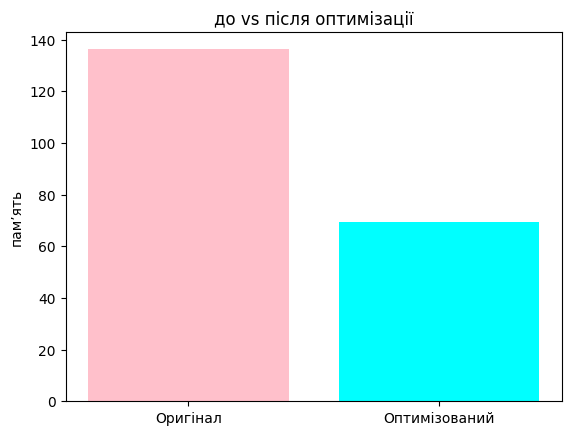

In [48]:
sizes = [
    df.memory_usage(deep=True).sum() / 1024 ** 2,
    optimized_df.memory_usage(deep=True).sum() / 1024 ** 2
]
labels = ['Оригінал', 'Оптимізований']

plt.bar(labels, sizes, color=['pink', 'cyan'])
plt.ylabel('памʼять')
plt.title('до vs після оптимізації')
plt.show()